# Task 2

In [5]:
import pandas as pd
import numpy as np

file_path = 'ratings.csv'
df = pd.read_csv(file_path)

ratings_matrix = df.pivot(index='userId', columns='movieId', values='rating')

ratings_matrix = ratings_matrix.dropna(thresh=15, axis=0)
ratings_matrix = ratings_matrix.dropna(thresh=50, axis=1)

print(ratings_matrix)
print(ratings_matrix.describe())

movieId  1       2       3       6       7       10      11      16      \
userId                                                                    
1           4.0     NaN     4.0     4.0     NaN     NaN     NaN     NaN   
2           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
5           4.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
...         ...     ...     ...     ...     ...     ...     ...     ...   
606         2.5     NaN     NaN     NaN     2.5     NaN     2.5     NaN   
607         4.0     NaN     NaN     NaN     NaN     NaN     3.0     NaN   
608         2.5     2.0     2.0     NaN     NaN     4.0     NaN     4.5   
609         3.0     NaN     NaN     NaN     NaN     4.0     NaN     NaN   
610         5.0     NaN     NaN     5.0     NaN     NaN     NaN     4.5   

movieId  17      19     

## Changing Nan to mean, min and max and demeaning matrices

### Mean

In [9]:
mean = ratings_matrix.mean()
min = ratings_matrix.min()
max = ratings_matrix.max()

ratings_matrix_Nan_mean = ratings_matrix.fillna(mean)
ratings_matrix_Nan_min = ratings_matrix.fillna(min)
ratings_matrix_Nan_max = ratings_matrix.fillna(max)

R_mean = ratings_matrix_Nan_mean.values
user_ratings_mean = np.mean(R_mean, axis=1)
R_demeaned = R_mean - user_ratings_mean.reshape(-1, 1)

print(ratings_matrix_Nan_mean.describe())

movieId      1           2           3           6           7       \
count    610.000000  610.000000  610.000000  610.000000  610.000000   
mean       3.920930    3.431818    3.259615    3.946078    3.185185   
std        0.494893    0.373020    0.305250    0.332808    0.288385   
min        0.500000    0.500000    0.500000    1.000000    1.000000   
25%        3.920930    3.431818    3.259615    3.946078    3.185185   
50%        3.920930    3.431818    3.259615    3.946078    3.185185   
75%        3.920930    3.431818    3.259615    3.946078    3.185185   
max        5.000000    5.000000    5.000000    5.000000    5.000000   

movieId      10          11          16          17          19      ...  \
count    610.000000  610.000000  610.000000  610.000000  610.000000  ...   
mean       3.496212    3.671429    3.926829    3.776119    2.727273  ...   
std        0.398577    0.303084    0.323063    0.377186    0.402077  ...   
min        0.500000    1.000000    1.000000    0.500000 

### Min

In [10]:
print(ratings_matrix_Nan_min.describe())

movieId      1           2           3           6           7       \
count    610.000000  610.000000  610.000000  610.000000  610.000000   
mean       1.705738    1.028689    0.735246    1.492623    1.193443   
std        1.708873    1.188165    0.829458    1.149510    0.684899   
min        0.500000    0.500000    0.500000    1.000000    1.000000   
25%        0.500000    0.500000    0.500000    1.000000    1.000000   
50%        0.500000    0.500000    0.500000    1.000000    1.000000   
75%        3.500000    0.500000    0.500000    1.000000    1.000000   
max        5.000000    5.000000    5.000000    5.000000    5.000000   

movieId      10          11          16          17          19      ...  \
count    610.000000  610.000000  610.000000  610.000000  610.000000  ...   
mean       1.148361    1.306557    1.393443    0.859836    1.249180  ...   
std        1.297543    0.904444    1.050118    1.092418    0.728411  ...   
min        0.500000    1.000000    1.000000    0.500000 

### Max

In [11]:
print(ratings_matrix_Nan_max.describe())

movieId      1           2           3           6           7       \
count    610.000000  610.000000  610.000000  610.000000  610.000000   
mean       4.619672    4.717213    4.851639    4.823770    4.839344   
std        0.714917    0.709390    0.574247    0.515451    0.591061   
min        0.500000    0.500000    0.500000    1.000000    1.000000   
25%        4.500000    5.000000    5.000000    5.000000    5.000000   
50%        5.000000    5.000000    5.000000    5.000000    5.000000   
75%        5.000000    5.000000    5.000000    5.000000    5.000000   
max        5.000000    5.000000    5.000000    5.000000    5.000000   

movieId      10          11          16          17          19      ...  \
count    610.000000  610.000000  610.000000  610.000000  610.000000  ...   
mean       4.674590    4.847541    4.855738    4.865574    4.672131  ...   
std        0.736851    0.521022    0.488463    0.537551    0.894635  ...   
min        0.500000    1.000000    1.000000    0.500000 

## SVD

In [31]:
from scipy.sparse.linalg import svds

U, sigma, Vt = svds(R_demeaned, k=3)
sigma = np.diag(sigma)

### U visualization

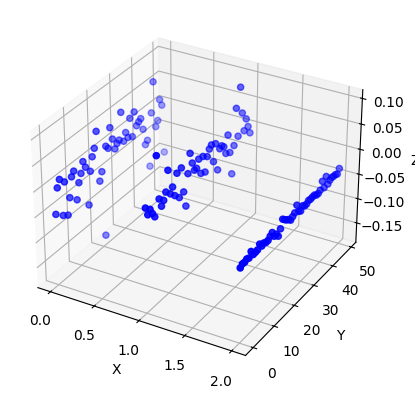

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

U_visualize = U[:50, :]

x = np.arange(U_visualize.shape[1])
y = np.arange(U_visualize.shape[0])
x, y = np.meshgrid(x, y)
z = U_visualize

x_flat = x.flatten()
y_flat = y.flatten()
z_flat = z.flatten()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_flat, y_flat, z_flat, c='b', marker='o')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

### V visualization

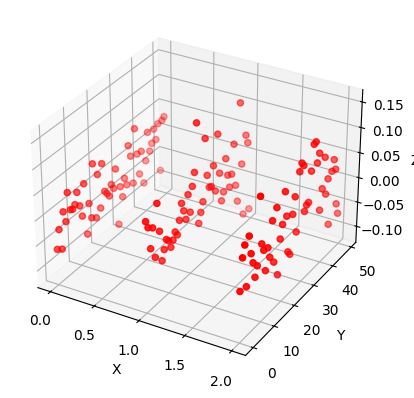

In [23]:
V_visualize = Vt.T[:50, :]

x_v = np.arange(V_visualize.shape[1])  
y_v = np.arange(V_visualize.shape[0]) 
x_v, y_v = np.meshgrid(x_v, y_v) 
z_v = V_visualize

x_flat_v = x_v.flatten()
y_flat_v = y_v.flatten()
z_flat_v = z_v.flatten()

fig_v = plt.figure()
ax_v = fig_v.add_subplot(111, projection='3d')

ax_v.scatter(x_flat_v, y_flat_v, z_flat_v, c='r', marker='o')

ax_v.set_xlabel('X')
ax_v.set_ylabel('Y')
ax_v.set_zlabel('Z')

plt.show()

# Task 3

In [41]:
U2, sigma2, Vt2 = svds(R_demeaned, k=6)
U3, sigma3, Vt3 = svds(R_demeaned, k=9)

sigma2 = np.diag(sigma2)
sigma3 = np.diag(sigma3)

In [42]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
preds_df = pd.DataFrame(all_user_predicted_ratings, columns=ratings_matrix.columns, index=ratings_matrix.index)

all_user_predicted_ratings2 = np.dot(np.dot(U2, sigma2), Vt2) + user_ratings_mean.reshape(-1, 1)
preds_df2 = pd.DataFrame(all_user_predicted_ratings2, columns=ratings_matrix.columns, index=ratings_matrix.index)

all_user_predicted_ratings3 = np.dot(np.dot(U3, sigma3), Vt3) + user_ratings_mean.reshape(-1, 1)
preds_df3 = pd.DataFrame(all_user_predicted_ratings3, columns=ratings_matrix.columns, index=ratings_matrix.index)

print(preds_df)

movieId    1         2         3         6         7         10        11      \
userId                                                                          
1        4.209778  3.626151  3.483868  4.138905  3.328808  3.630721  3.840543   
2        3.910651  3.427449  3.264808  3.932935  3.191520  3.488480  3.659811   
3        3.869778  3.386860  3.197455  3.910405  3.134757  3.475648  3.626116   
4        3.937332  3.412868  3.335341  3.854407  3.187530  3.368161  3.605345   
5        3.885417  3.400387  3.253085  3.919545  3.190137  3.450024  3.648873   
...           ...       ...       ...       ...       ...       ...       ...   
606      3.843683  3.325811  3.230708  3.910421  3.193308  3.330165  3.637229   
607      4.036562  3.546963  3.372618  3.967030  3.228631  3.597422  3.700368   
608      3.138769  2.937512  2.424334  3.780076  2.812770  3.494475  3.431658   
609      3.841075  3.382576  3.232748  3.905980  3.196329  3.445928  3.642018   
610      4.108621  3.577557 

In [43]:
print(preds_df2)

movieId    1         2         3         6         7         10        11      \
userId                                                                          
1        4.219601  3.573803  3.372645  3.994441  3.314586  3.634292  3.848276   
2        3.904871  3.421552  3.249704  3.916874  3.187180  3.503114  3.666889   
3        3.913835  3.392486  3.172549  3.904132  3.161660  3.412224  3.648645   
4        3.924285  3.351104  3.070906  3.637654  3.178128  3.493000  3.784459   
5        3.883207  3.388262  3.212340  3.881172  3.186903  3.467602  3.670567   
...           ...       ...       ...       ...       ...       ...       ...   
606      3.877836  3.352039  3.309629  3.984844  3.214778  3.242786  3.587892   
607      3.972579  3.585133  3.533290  4.112410  3.202450  3.655584  3.625803   
608      3.112780  2.984924  2.600295  3.942435  2.807554  3.480687  3.342795   
609      3.855167  3.378354  3.193624  3.880580  3.205335  3.438473  3.672516   
610      4.148805  3.567739 

In [44]:
print(preds_df3)

movieId    1         2         3         6         7         10        11      \
userId                                                                          
1        4.208858  3.600272  3.390272  4.031662  3.317098  3.658579  3.880314   
2        3.901451  3.423931  3.251503  3.932485  3.191376  3.521609  3.670998   
3        3.948220  3.440921  3.192309  4.000522  3.178917  3.511842  3.679159   
4        3.829353  3.338942  3.081131  3.751255  3.214954  3.633977  3.821051   
5        3.939532  3.398539  3.206474  3.878233  3.185597  3.470680  3.651709   
...           ...       ...       ...       ...       ...       ...       ...   
606      3.891772  3.296947  3.273876  3.941833  3.220615  3.237617  3.525457   
607      3.823937  3.552576  3.546442  4.081335  3.194789  3.598514  3.670242   
608      2.267401  2.719764  2.618990  4.033029  2.881897  3.600657  3.514220   
609      3.843650  3.367788  3.189373  3.890774  3.211808  3.458920  3.667832   
610      4.080534  3.592904 

In [47]:
only_preds = preds_df.where(ratings_matrix.isna())
print(only_preds)

movieId    1         2         3         6         7         10        11      \
userId                                                                          
1             NaN  3.626151       NaN       NaN  3.328808  3.630721  3.840543   
2        3.910651  3.427449  3.264808  3.932935  3.191520  3.488480  3.659811   
3        3.869778  3.386860  3.197455  3.910405  3.134757  3.475648  3.626116   
4        3.937332  3.412868  3.335341  3.854407  3.187530  3.368161  3.605345   
5             NaN  3.400387  3.253085  3.919545  3.190137  3.450024  3.648873   
...           ...       ...       ...       ...       ...       ...       ...   
606           NaN  3.325811  3.230708  3.910421       NaN  3.330165       NaN   
607           NaN  3.546963  3.372618  3.967030  3.228631  3.597422       NaN   
608           NaN       NaN       NaN  3.780076  2.812770       NaN  3.431658   
609           NaN  3.382576  3.232748  3.905980  3.196329       NaN  3.642018   
610           NaN  3.577557 

In [65]:
def recomendations(user_id, preds_df):
    user_ids = pd.read_csv("tags.csv")
    films = pd.read_csv("movies.csv")

    user_ratings = preds_df.loc[user_id]
    top_10_films = user_ratings.nlargest(10)
    
    top_films_data = pd.merge(top_10_films, films, on='movieId')
    result = top_films_data[['title', 'genres']]

    return top_10_films, result

In [66]:
top_10_movies, table = recomendations(1, preds_df)
print(top_10_movies)
print(table)

movieId
318     4.741186
356     4.557119
527     4.549404
912     4.541737
904     4.525523
1221    4.520260
1276    4.519258
1208    4.510495
1213    4.489910
858     4.484117
Name: 1, dtype: float64
                              title                    genres
0  Shawshank Redemption, The (1994)               Crime|Drama
1               Forrest Gump (1994)  Comedy|Drama|Romance|War
2           Schindler's List (1993)                 Drama|War
3                 Casablanca (1942)             Drama|Romance
4                Rear Window (1954)          Mystery|Thriller
5    Godfather: Part II, The (1974)               Crime|Drama
6             Cool Hand Luke (1967)                     Drama
7             Apocalypse Now (1979)          Action|Drama|War
8                 Goodfellas (1990)               Crime|Drama
9             Godfather, The (1972)               Crime|Drama
